<a href="https://colab.research.google.com/github/KorintusDr/Prediksi_Harga_Rumah_ML/blob/main/PrediksiHargaRumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Memprediksi Harga Rumah dengan Machine Learning: Multiple Linear Regression**

 Multiple Linear Regression Secara matematis, persamaan dari Multiple Linear Regression / Regresi Linear Berganda adalah sebagai berikut:


Y = b + e + m1*x1 + m2*x2 + … + mn*xn


Y = dependent variable

mn = koefisien dari persamaan

xn = independent variable

b = intercept

e = error

# **Tahapan dalam pengerjaan kasus kali ini adalah sebagai berikut:**
1. Load library python
2. Load dataset
3. Sneak peak data
4. Handling missing values
5. Exploratory Data Analysis (EDA)
6. Modelling
7. Prediction

## 1. Sebelum mulai membuat model, saya memuat dulu library yang akan digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 2. Setelah semua senjata sudah siap, ucup nyiapin amunisinya yaitu data menggunakan pandas.

In [11]:
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

1. Nama data yang saya load adalah df.
2. Data aslinya bernama kc_house_data.csv dan memiliki banyak kolom (features)
3. Saya hanya menggunakan beberapa features saja yaitu bedrooms, bathrooms, sqft_living, grade, price, dan yr_built

## 3. Setelah semua persiapan perang telah ada, saya coba melihat karakteristik data from the surfaces.

In [12]:
#Melihat 5 baris teratas dari data.
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built.
#Dependent variabel(y) adalah price.
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


Penjelasan setiap kolom:
1. bedrooms = Jumlah kamar tidur
2. bathrooms = Jumlah kamar mandi
3. sqft_living = Luas rumah dalam satuan sqft
4. grade = Grading system dari pemerintah King County US
5. yr_built = Tahun dimana rumah dibangun
6. price = Harga dari rumah (US$)

In [13]:
#Mengetahui jumlah kolom dan baris dari data.
#Data mempunya 6 kolom (features) dengan 21613 baris.
df.shape

(21613, 6)

In [14]:
#Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [15]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


1. Pada feature bathrooms terdapat nilai pecahan, aneh kan yak kalo ada nilai jumlah kamar mandi pecahan gitu. Maka ucup ubah dulu jenis data yang semula float menjadi int.
2. Pada feature bedrooms terdapat nilai 33, ini sangat aneh karena masak rumah ada yang punya kamar 33 apalagi ini rumah pribadi. jadi kemungkinan itu typo dan akan saya ganti menjadi 3.

In [16]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['bathrooms'] = df['bathrooms'].astype(int)

#Mengganti nilai 33 menjadi 3.
df['bedrooms'] = df['bedrooms'].replace(33,3)

## 4. Checking data apakah terdapat missing values atau data yang kosong atau tidak.

In [17]:
#Mencari dan menangani missing values.
#Ternyata datanya sudah tidak ada missing values.
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

## 5. Langkah selanjutnya adalah melakukan Exploratory Data Analysis untuk mengenal data lebih jauh.

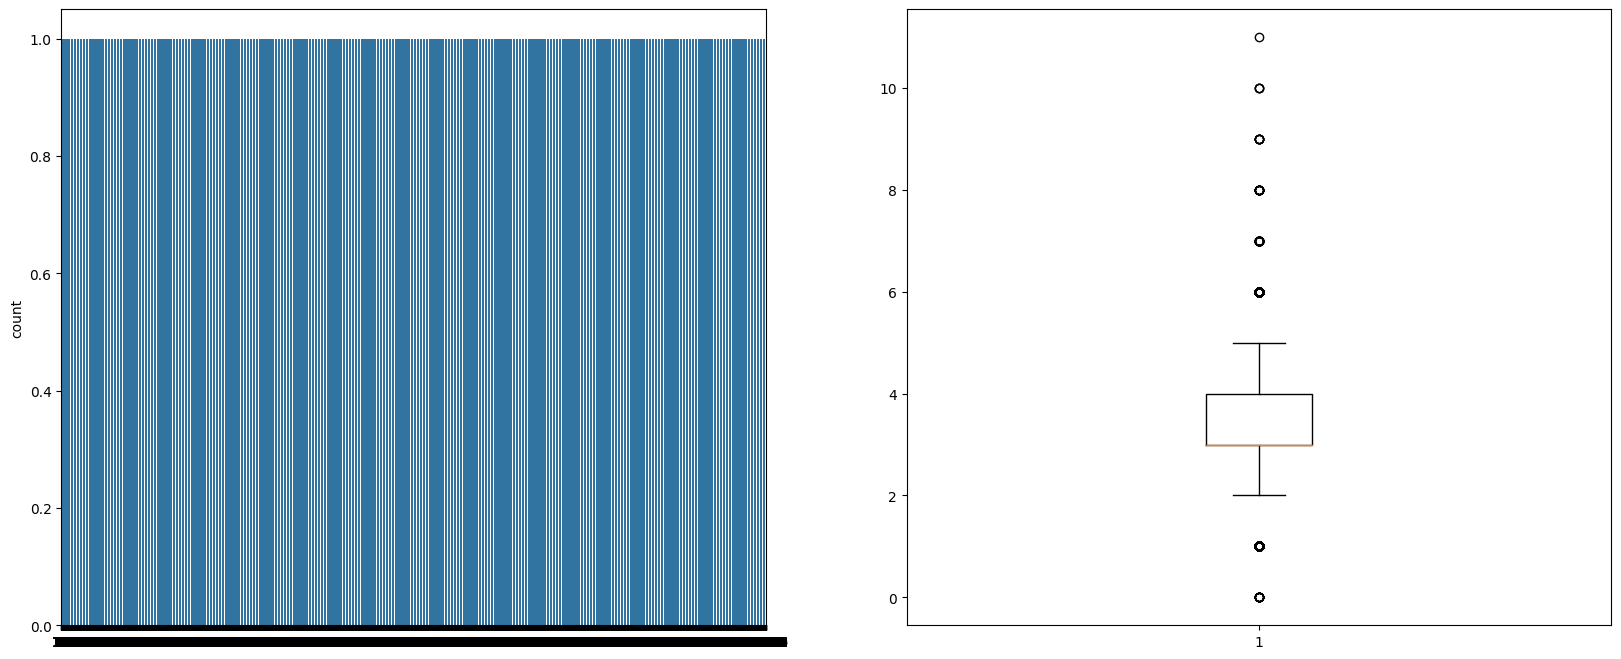

In [18]:
#Univariate analysis bedrooms.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

1. Dapat dilihat bahwa sebagian besar jumlah kamar tidur itu di angka 3 dan 4.
2. Data memiliki banyak outliers.

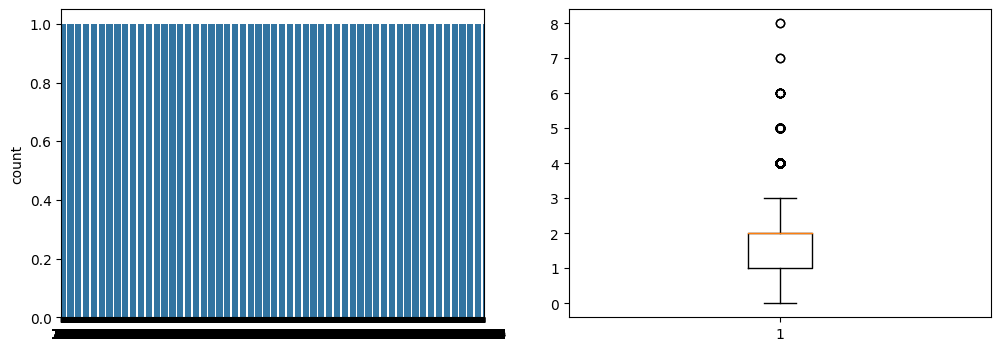

In [19]:
#Univariate analysis bathrooms.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

1. Jumlah kamar mandi paling banyak berada pada angka 1 dan 2.
2. Yang menarik disini adalah dimana ada rumah yang tidak ada kamar mandinya atau jumlahnya 0.
3. Nilai outlier sendiri lumayan banyak.

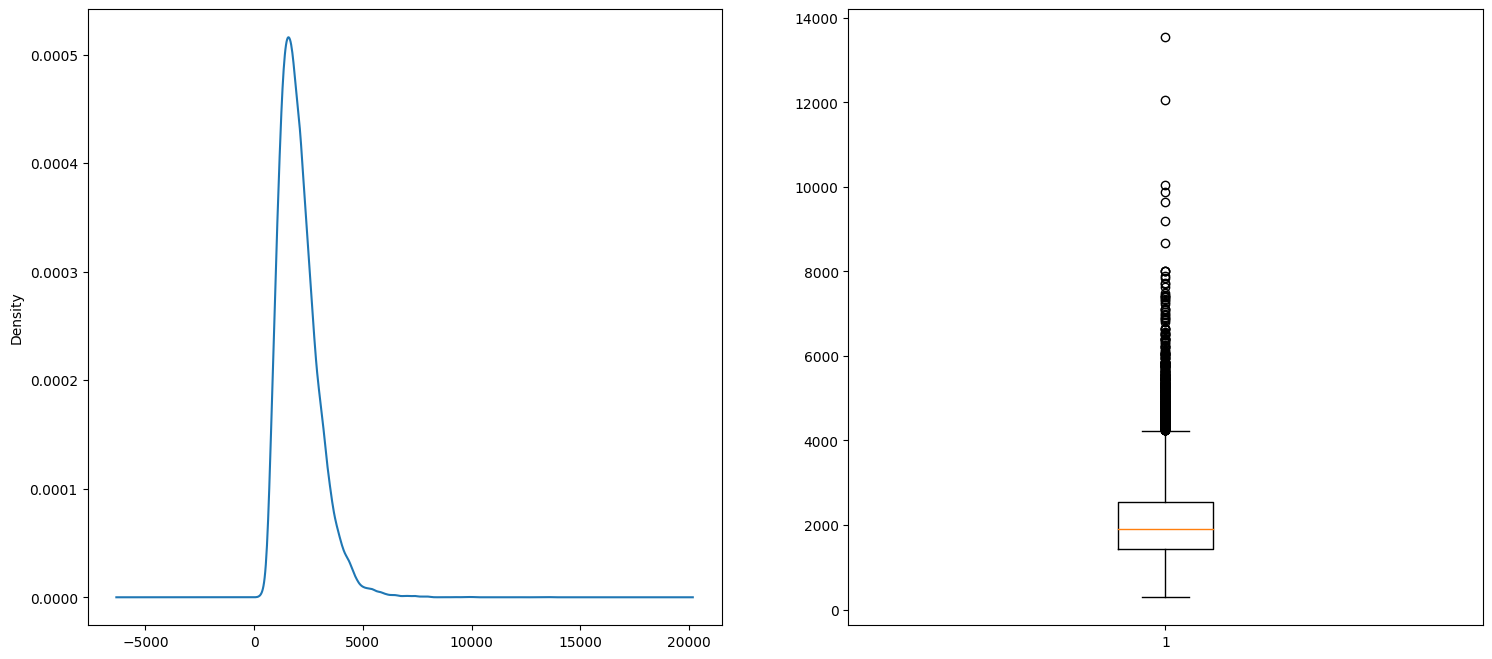

In [20]:
#Univariate analysis sqft_living.
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqft_living'])
plt.show()

1. Density dari distribusi luas rumah berada di sekitar angka 2000an.
2. Banyak terdapat outliers.

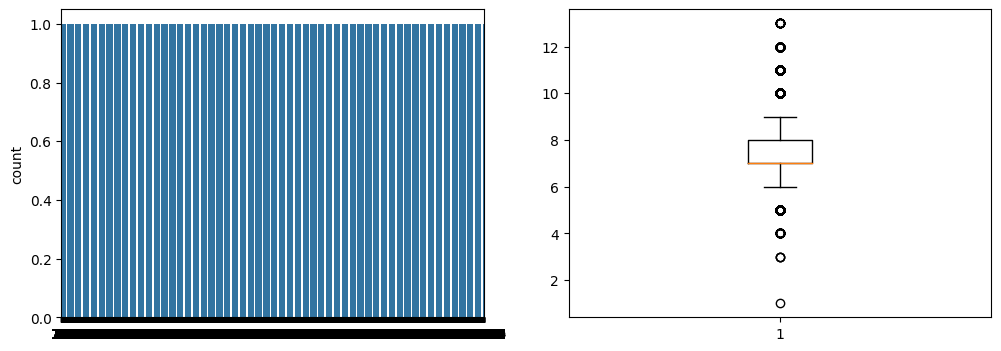

In [21]:
#Univariate analysis grade.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['grade'])
f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

1. Sebagian besar rumah di County King US memiliki grade 7 dan 8.
2. Dilihat dari boxplot, data memiliki beberapa outliers.

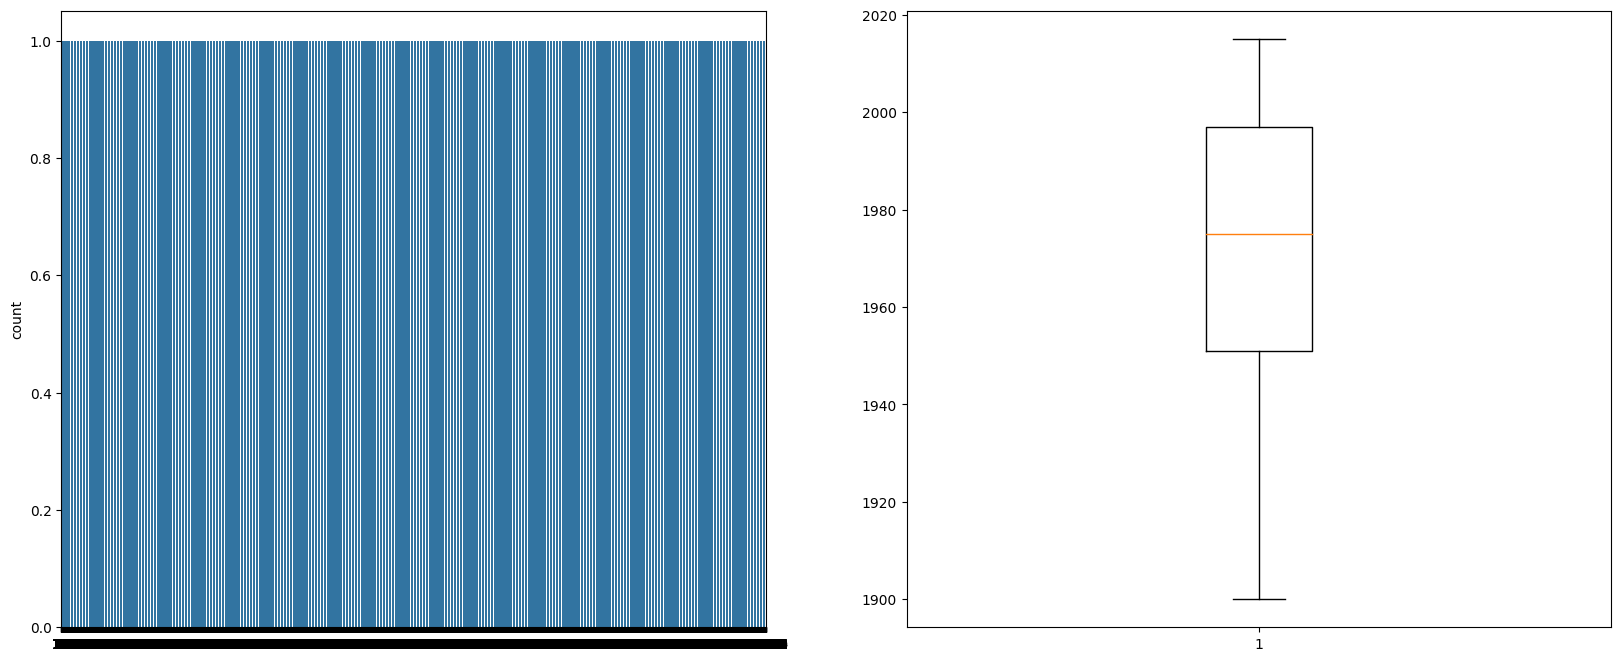

In [27]:
#Univariate analysis yr_built.
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(df['yr_built'])
plt.show()

1. Dapat dilihat bahwa semakin tua umur dari rumah, maka semakin sedikit orang yang menjual rumahnya tersebut.
2. Density terdapat di sekitar tahun 1980an.
3. Data tidak memiliki outliers.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

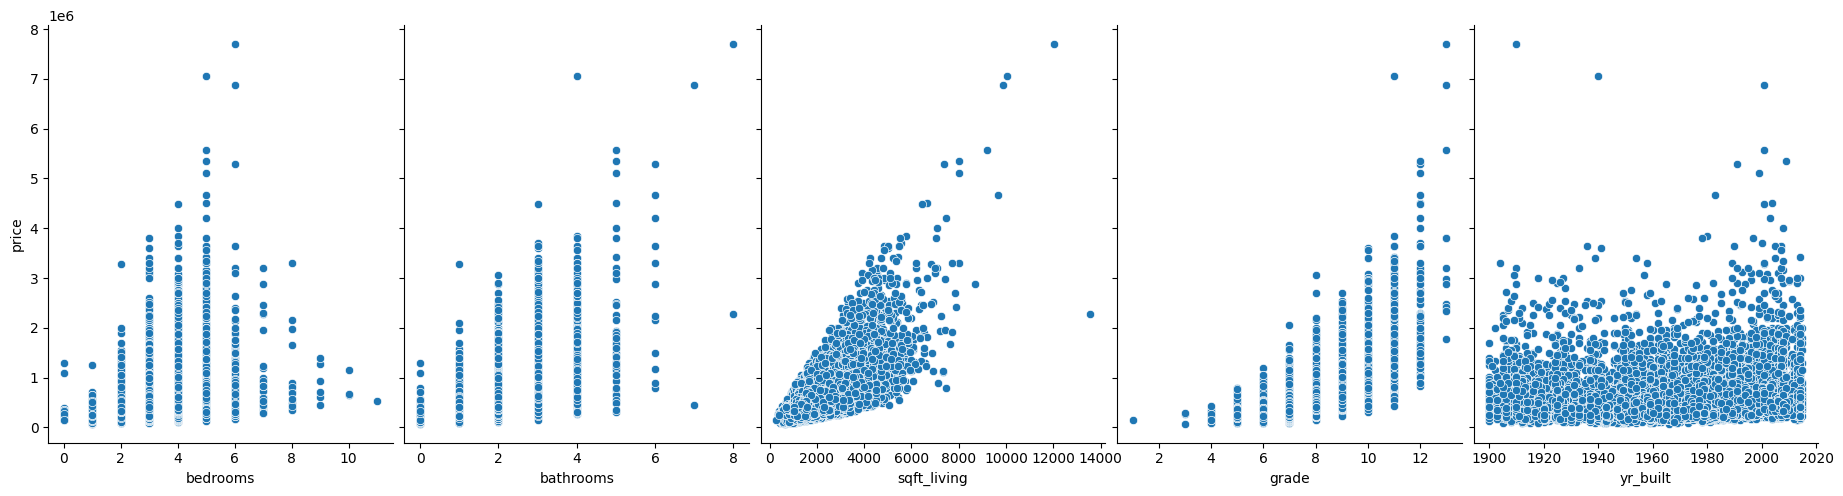

In [49]:
#Analisis bivariat antara variabel bebas dan variabel terikat
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)

In [42]:
# Hitung matriks korelasi dan bulatkan ke 2 tempat desimal
corr_matrix = df.corr().round(2)

# Cetak matriks korelasi
print(corr_matrix)

             price  bedrooms  bathrooms  sqft_living  grade  yr_built
price         1.00      0.32       0.51         0.70   0.67      0.05
bedrooms      0.32      1.00       0.48         0.59   0.37      0.16
bathrooms     0.51      0.48       1.00         0.70   0.61      0.43
sqft_living   0.70      0.59       0.70         1.00   0.76      0.32
grade         0.67      0.37       0.61         0.76   1.00      0.45
yr_built      0.05      0.16       0.43         0.32   0.45      1.00


In [43]:
# Hitung matriks korelasi dan bulatkan ke 2 tempat desimal
corr_matrix = df.corr().round(2)

# Format matriks menggunakan NumPy
formatted_matrix = np.array2string(corr_matrix.to_numpy(), precision=2, separator=', ', suppress_small=True)

# Cetak matriks yang diformat
print(formatted_matrix)

[[1.  , 0.32, 0.51, 0.7 , 0.67, 0.05],
 [0.32, 1.  , 0.48, 0.59, 0.37, 0.16],
 [0.51, 0.48, 1.  , 0.7 , 0.61, 0.43],
 [0.7 , 0.59, 0.7 , 1.  , 0.76, 0.32],
 [0.67, 0.37, 0.61, 0.76, 1.  , 0.45],
 [0.05, 0.16, 0.43, 0.32, 0.45, 1.  ]]


In [45]:
# Format the correlation matrix and set precision to 2 decimal places
df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


1. Dari tabel korelasi dan gambar pairplot, dapat dilihat bahwa sqft_living mempunyai hubungan linear positif yang sangat kuat dengan price jika dibandingkan yang lain.
2. Nilai korelasi yr_built hampir mendekati nol yang menandakan bahwa usia rumah tidak mempengaruhi pada harga rumah.

## 6. Setelah saya mengetahui karakteristik dari datanya, saya langsung lanjutkan ke tahapan modelling.

In [46]:
#Pertama, buat variabel x dan y.
x = df.drop(columns='price')
y = df['price']
#Kedua, ucup split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Ketiga, ucup bikin object linear regresi.
lin_reg = LinearRegression()
#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790617    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717696


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:

Y = -53061.75x1 + 64658.56x2 + 188.91x3 + 131290.89x4–3969.56x5 + 7031568

In [47]:
#Cari tahu accuracy score dari model menggunakan testing data yang sudah displit.
lin_reg.score(x_test, y_test)

0.61251132869411

1. Model Machine Learning saya mendapatkan accuracy score sebesar 61.13%.
2. Cukup baik untuk iterasi pertama.

# 7. Langkah terakhir saya melakukan prediksi terhadap kriteria rumah idaman saya.

 Saya ingin membeli rumah kriteria sebagai berikut:
1. Jumlah bedrooms = 3
2. Jumlah bathrooms = 2
3. Luas rumahnya = 1800 sqft
4. Dengan grade 7
5. Tahun pembuatan rumahnya tahun 1990

In [48]:
#Prediksi harga rumah idaman Joko.
lin_reg.predict([[3,2,1800,7,1990]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([361351.99342265])

Yeay! Harga rumah idaman saya adalah sekitar 361351 US